In [44]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [42]:
sigmaLst = (0.5, 1, 2, 2.38, 3, 5)

In [201]:
def acf(sampl,lag =40):
    acr = [1]
    for t in range(1,lag):
        acr.append(sampl[t:].dot(sampl[:-t])/(len(sampl)-t))
    x = list(range(lag))
    plt.bar(x,acr,color='gray')
    plt.title('ACF')
    plt.hlines(0.05,xmin=-0.5 ,xmax=lag,colors='r',linestyles='dashed')
    plt.hlines(-0.05,xmin=-0.5 ,xmax=lag,colors='r',linestyles='dashed')
    #plt.show()

In [202]:
def hist(sampled,tlt,nbin =19):
    grid =np.linspace(-4,4,1000)
    plt.hist(sampled, bins=nbin,color='gray',density=True)
    plt.plot(grid , stats.norm.pdf(grid), 'black')
    plt.title(tlt)
    plt.xlabel('x')
    plt.xlim(-4,4)
    plt.ylabel('density')
    #plt.show()

In [203]:
def Metropolis(maxiter,sigma,initx=None, graph=False):
    if initx==None:
        initx = np.random.normal()
    x = [initx]
    accept = 0
    for t in range(maxiter-1):
        z = np.random.normal(scale=sigma)
        xprime = x[t] + z
        alpha = stats.norm.pdf(xprime)/stats.norm.pdf(x[t])
        p = min(1,alpha)
        if np.random.random() <= p:
            accept = accept + 1
            x.append(xprime)
        else:
            x.append(x[t])
    outx = np.array(x)
    acceptrate = accept/maxiter
    if graph == True:
        plt.figure(figsize=(10, 3))
        plt.subplot(1,2,1)
        hist(outx,tlt='Sigma %.2f'%sigma)
        plt.subplot(1,2,2)
        acf(outx)
        plt.show()
    return(outx, acceptrate)

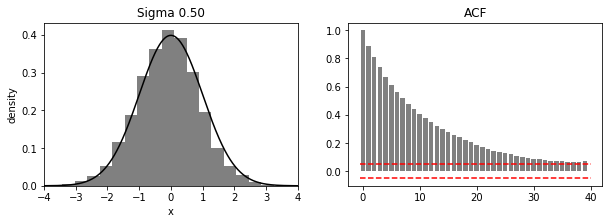

Acceptance ratio : 0.852


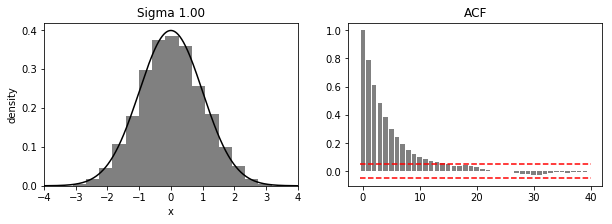

Acceptance ratio : 0.700


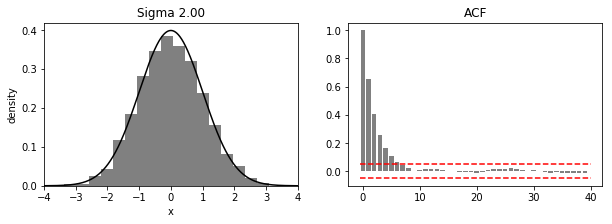

Acceptance ratio : 0.502


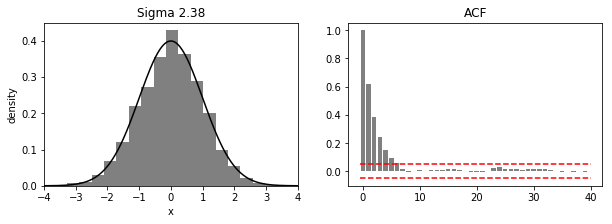

Acceptance ratio : 0.446


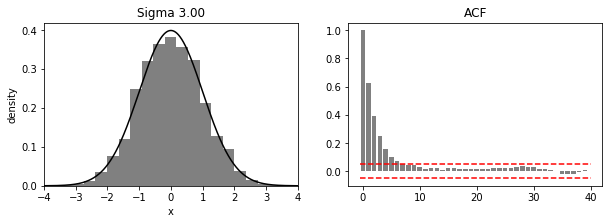

Acceptance ratio : 0.374


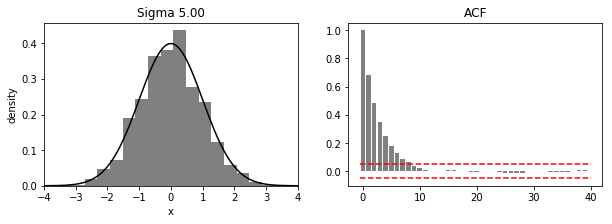

Acceptance ratio : 0.241


In [204]:
for sigma in sigmaLst:
    sampl,acratio = Metropolis(10000,sigma=sigma,graph=1)
    print('Acceptance ratio : %.3f' %acratio)

In [205]:
-2.3/np.sqrt(17.388)

-0.5515730271077477

In [207]:
stats.norm.cdf(-0.552)

0.2904741766351465